# UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Oasis Infobyte/

/content/drive/MyDrive/Colab Notebooks/Oasis Infobyte


In [3]:
import pandas as pd

# Load your dataset
unemployment_data = pd.read_csv('Unemployment in India.csv')
unemployment_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values
print(unemployment_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [5]:
unemployment_data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
# Handle missing values
unemployment_data.dropna(inplace=True)

unemployment_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [7]:
# Summary statistics
print(unemployment_data.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

In [8]:
# Convert 'Date' column to datetime
unemployment_data[' Date'] = pd.to_datetime(unemployment_data[' Date'].str.strip(), format='%d-%m-%Y')

unemployment_data[' Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name:  Date, Length: 740, dtype: datetime64[ns]

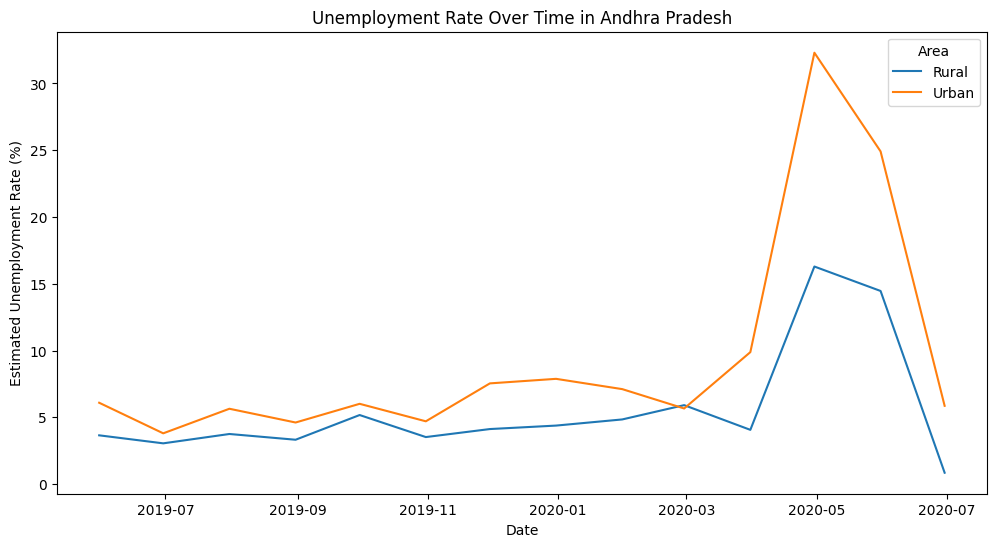

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Line plot of unemployment rate over time for a specific region (e.g., Andhra Pradesh)
andhra_pradesh_data = unemployment_data[unemployment_data['Region'] == 'Andhra Pradesh']

plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=andhra_pradesh_data, hue='Area')
plt.title('Unemployment Rate Over Time in Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

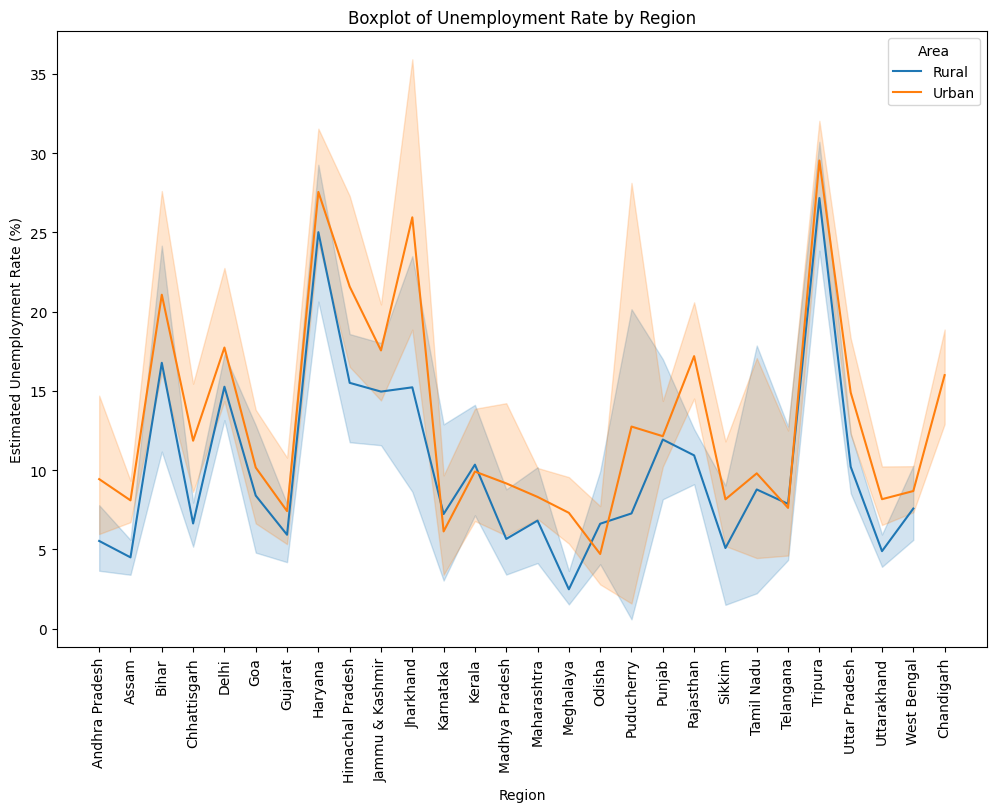

In [10]:
# lineplot of unemployment rate by region
plt.figure(figsize=(12, 8))
sns.lineplot(x='Region', y=' Estimated Unemployment Rate (%)', data=unemployment_data, hue='Area')
plt.title('Boxplot of Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

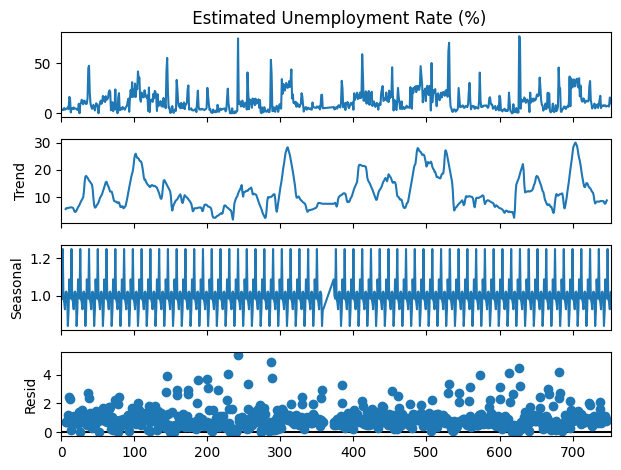

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure positive values for decomposition
unemployment_data[' Estimated Unemployment Rate (%)'] = unemployment_data[' Estimated Unemployment Rate (%)'] + 0.001

# Decompose time series into trend, seasonal, and residual components
result = seasonal_decompose(unemployment_data[' Estimated Unemployment Rate (%)'], model='multiplicative', period=12)

# Plot the components
result.plot()
plt.show()



<ipython-input-12-725e14456bdd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = unemployment_data.corr()


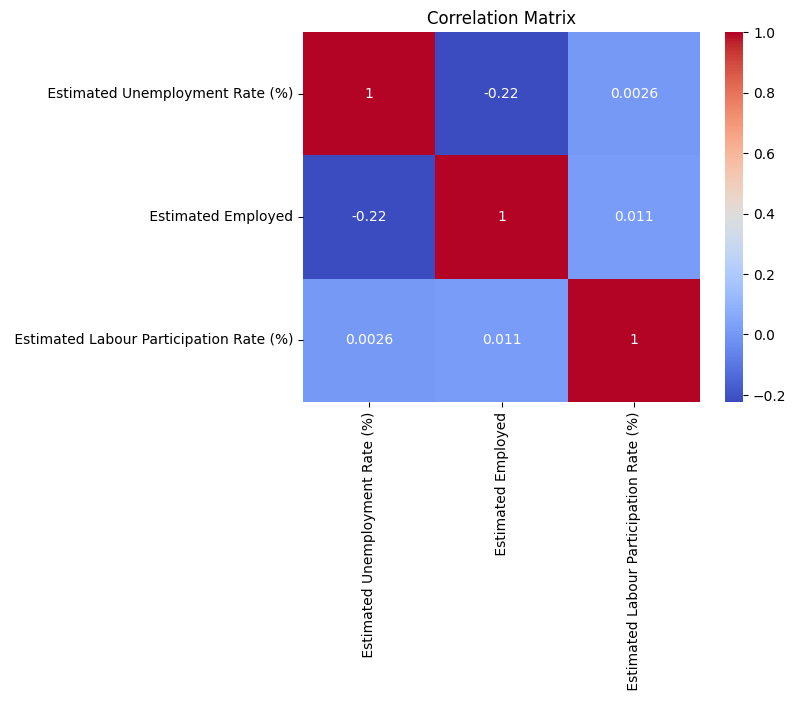

In [12]:
correlation_matrix = unemployment_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

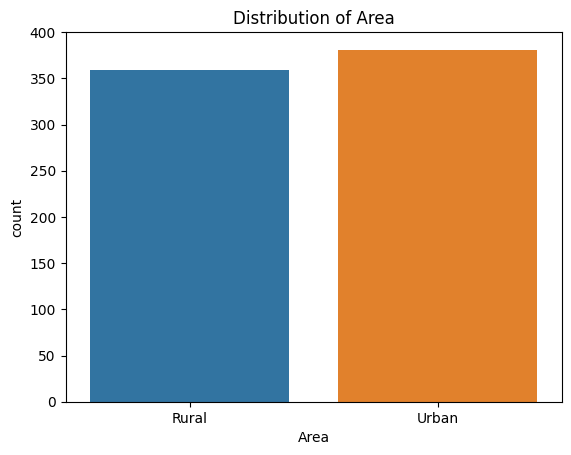

In [13]:
sns.countplot(data=unemployment_data, x='Area')
plt.title('Distribution of Area')
plt.show()

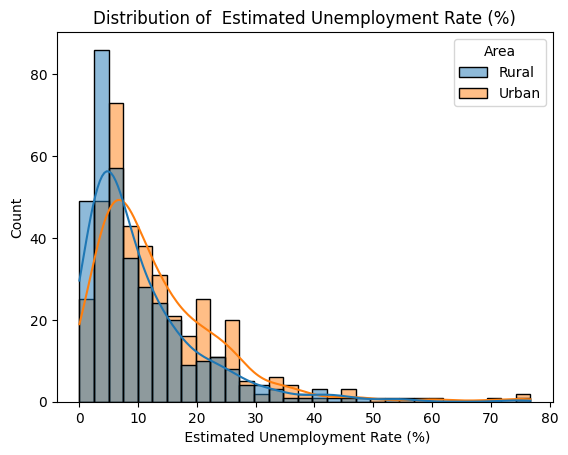

In [14]:
sns.histplot(data=unemployment_data, x=' Estimated Unemployment Rate (%)', kde=True, hue= 'Area')
plt.title('Distribution of  Estimated Unemployment Rate (%)')
plt.show()

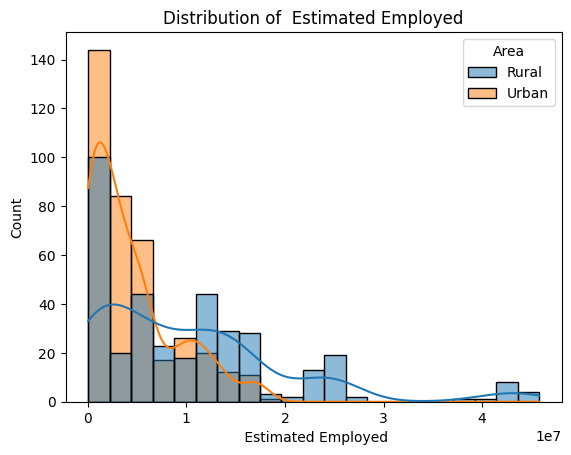

In [15]:
sns.histplot(data=unemployment_data, x=' Estimated Employed', kde=True, hue = 'Area')
plt.title('Distribution of  Estimated Employed')
plt.show()

In [18]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [19]:
data.shape

(267, 9)

In [20]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [21]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [22]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [23]:
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")

In [26]:
data[' Date']=pd.to_datetime(data[' Date'],dayfirst=True)

In [27]:
data['month_int']=data[' Date'].dt.month
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


<Axes: >

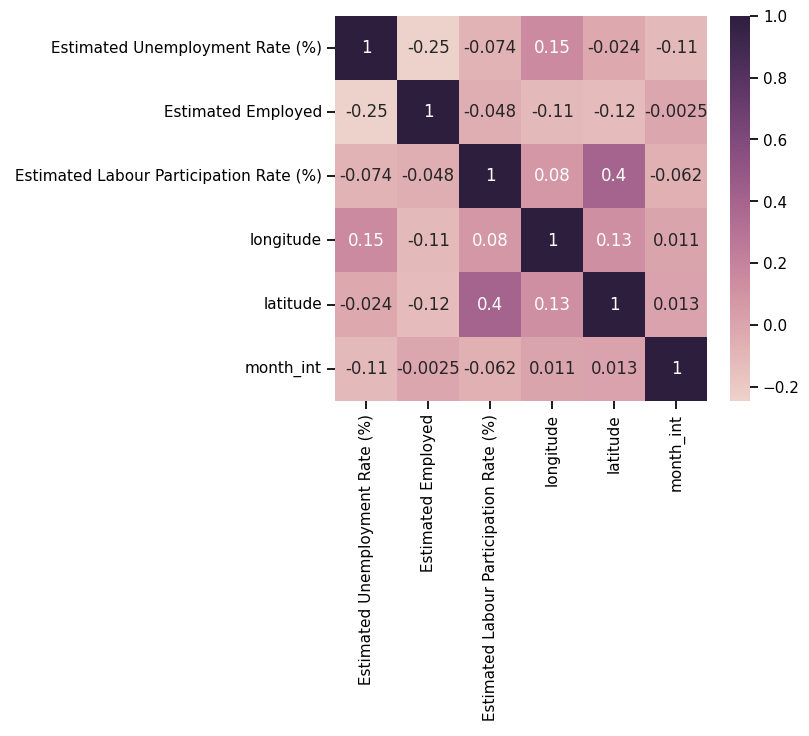

In [30]:
heatmap= data[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'longitude', 'latitude', 'month_int']]
heatmap = heatmap.corr()
plt.figure(figsize=(6,5))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

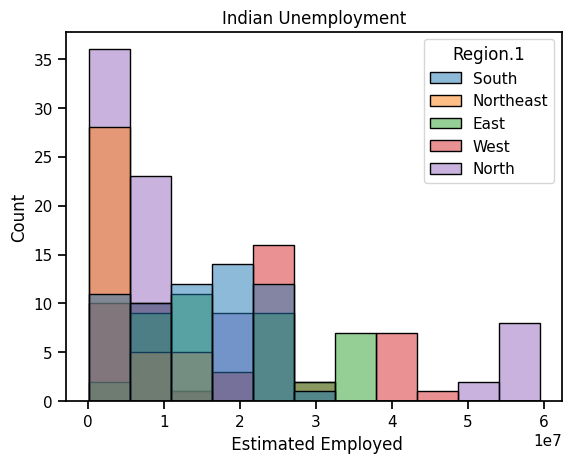

In [31]:
data.columns= ["Region"," Date"," Frequency",
               " Estimated Unemployment Rate (%)"," Estimated Employed",
               " Estimated Labour Participation Rate (%)","Region.1",
               "longitude","latitude","month_int"]
plt.title("Indian Unemployment")
sns.histplot(x=" Estimated Employed", hue="Region.1", data=data)
plt.show()

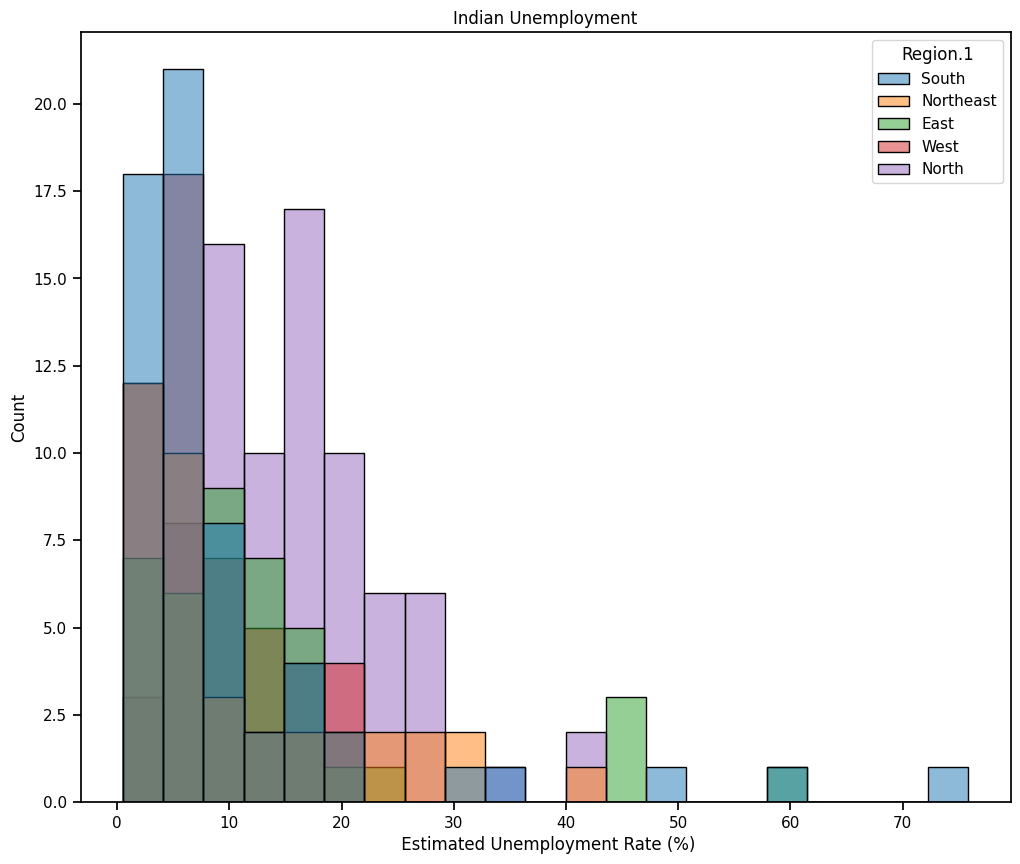

In [32]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x=" Estimated Unemployment Rate (%)", hue="Region.1", data=data)
plt.show()

In [33]:
after_lockdown = data[(data['month_int'] >= 4) & (data['month_int'] <=6)]
before_lockdown = data[(data['month_int'] >= 1) & (data['month_int'] <=4)]

In [34]:
af_lockdown=after_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown= before_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown[' Estimated Unemployment Rate (%)']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,9.4025,13.750000
1,Assam,6.2250,7.070000
2,Bihar,20.7425,36.806667
3,Chhattisgarh,7.2450,9.380000
4,Delhi,17.6975,25.713333
